In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded= files.upload() 

Saving bhp.xlsx to bhp.xlsx


You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers.This is quite similar to step (3) and you will get exact same result

In [ ]:
df=pd.read_excel("bhp.xlsx")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.tail(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
df.price_per_sqft.mean()

7920.336742424242

In [ ]:
df.price_per_sqft.std()

106727.16032810867

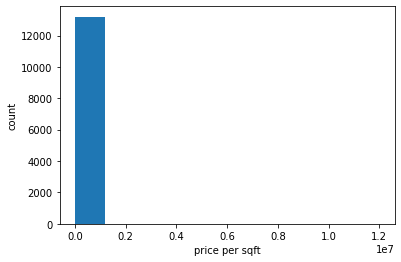

In [ ]:
#plot histogram
plt.hist(df.price_per_sqft)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

TypeError: ignored

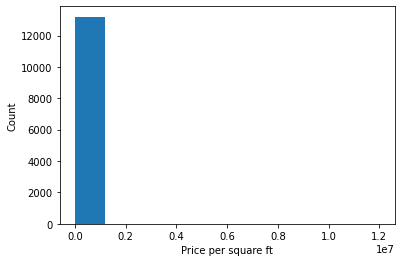

In [ ]:
#log
plt.hist(df.price_per_sqft)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Treat outliers using percentile first


In [ ]:
df.shape

(13200, 7)

In [ ]:
lowerlimit = df.price_per_sqft.quantile(0.001)

In [ ]:
upperlimit=df.price_per_sqft.quantile(0.999)

In [ ]:
lowerlimit

1366.184

In [ ]:
upperlimit

50959.36200000098

In [ ]:
outliers = df[(df.price_per_sqft>upperlimit) | (df.price_per_sqft<lowerlimit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [ ]:
newdf= df[(df.price_per_sqft<upperlimit) & (df.price_per_sqft>lowerlimit)]



In [ ]:
newdf.shape

(13172, 7)

use 4 standard deviation to remove outliers

In [ ]:
ulimit = newdf.price_per_sqft.mean() + 4*newdf.price_per_sqft.std()
llimit = newdf.price_per_sqft.mean() - 4*newdf.price_per_sqft.std()

In [ ]:
ulimit

23227.73653589432

In [ ]:
llimit

-9900.429065502582

In [ ]:
newdf[(newdf.price_per_sqft>ulimit) | (newdf.price_per_sqft<llimit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [ ]:
newdf2= newdf[(newdf.price_per_sqft<ulimit) & (newdf.price_per_sqft>llimit)]

In [ ]:
newdf2.shape

(13047, 7)

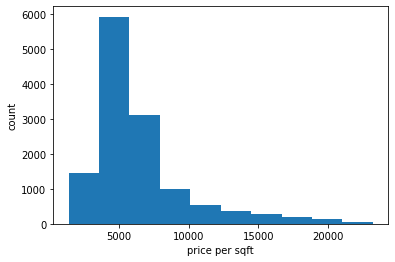

In [ ]:
plt.hist(newdf2.price_per_sqft)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

In [ ]:
newdf2.price_per_sqft.mean()

6449.328044761248

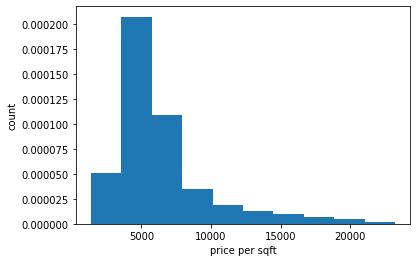

In [ ]:
plt.hist(newdf2.price_per_sqft,density = True)
plt.xlabel('price per sqft')
plt.ylabel('count')

plt.show()


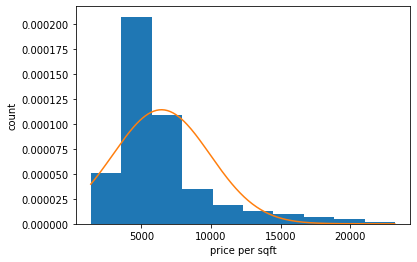

In [ ]:
from scipy.stats import norm
plt.hist(newdf2.price_per_sqft,density = True)
plt.xlabel('price per sqft')
plt.ylabel('count')

rng = np.arange(newdf2.price_per_sqft.min(), newdf2.price_per_sqft.max(),100)
plt.plot(rng, norm.pdf(rng,newdf2.price_per_sqft.mean(),newdf2.price_per_sqft.std()))

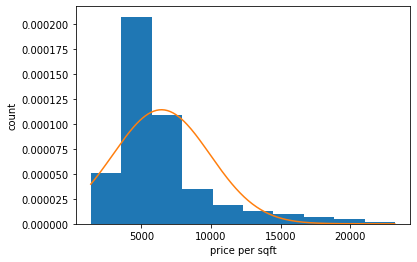

In [ ]:
from scipy.stats import norm
plt.hist(newdf2.price_per_sqft,density = True)
plt.xlabel('price per sqft')
plt.ylabel('count')

rng = np.arange(newdf2.price_per_sqft.min(), newdf2.price_per_sqft.max(),100) # norm.pdf = probability density function
plt.plot(rng, norm.pdf(rng,newdf2.price_per_sqft.mean(),newdf2.price_per_sqft.std()))

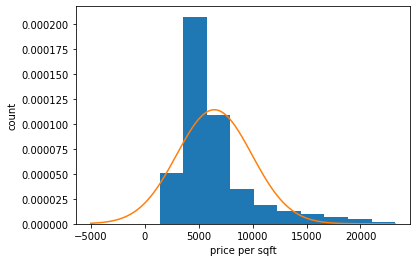

In [ ]:
from scipy.stats import norm
plt.hist(newdf2.price_per_sqft,density = True)
plt.xlabel('price per sqft')
plt.ylabel('count')

rng = np.arange(-5000, newdf2.price_per_sqft.max(),100) # norm.pdf = probability density function
plt.plot(rng, norm.pdf(rng,newdf2.price_per_sqft.mean(),newdf2.price_per_sqft.std()))

Now remove outliers using z score. Use z score of 4 as your thresold


In [ ]:
newdf['zscore'] = (newdf.price_per_sqft - newdf.price_per_sqft.mean())/newdf.price_per_sqft.std()
newdf.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12258,Kathriguppe,3 BHK,1390.0,2.0,69.49,3,4999,-0.401991
28,Ramagondanahalli,2 BHK,1151.0,2.0,48.77,2,4237,-0.586004
6422,Bannerghatta Road,2 BHK,1268.0,2.0,69.00,2,5441,-0.295254
3875,other,4 BHK,1200.0,6.0,70.00,4,5833,-0.200592
9428,Bommanahalli,3 BHK,1416.0,2.0,85.00,3,6002,-0.159780
6514,7th Phase JP Nagar,2 BHK,1000.0,2.0,61.00,2,6100,-0.136115
5668,Panathur,2 BHK,1235.0,2.0,65.00,2,5263,-0.338239
11236,Yelahanka,3 BHK,1705.0,3.0,85.00,3,4985,-0.405372
6010,Ramamurthy Nagar,3 Bedroom,1600.0,3.0,75.00,3,4687,-0.477335
8316,Hormavu,2 BHK,1200.0,2.0,68.00,2,5666,-0.240920


In [ ]:
outliers_z = newdf[(newdf.zscore < -4) | (newdf.zscore>4)]
outliers_z.shape

(125, 8)

In [ ]:
df4 = newdf[(newdf.zscore>-4)&(newdf.zscore<4)]
df4.shape

(13047, 8)